# <h1 align=center> PROYECTO INDIVIDUAL Nº1 </h1>
<hr>
<h2 align=center>Análisis Exploratorio de Datos (EDA)</h2>

**Importamos librerias**

In [7]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns


**1-Extracción de los datos**

Lo primero que hacemos es leer los datos de los archivos .csv y json utilizando dataframe de pandas.

In [10]:
df_amazon = pd.read_csv("../Datasets/amazon_prime_titles.csv", index_col=0 )
df_disney = pd.read_csv("../Datasets/disney_plus_titles.csv", index_col=0  )
df_hulu = pd.read_csv("../Datasets/Hulu_titles.csv", index_col=0)
df_netflix = pd.read_json("../Datasets/netflix_titles.json")

Establecemos "show_id" como indice.

In [ ]:
df_netflix.set_index("show_id", inplace=True)
df_netflix.head(5)

**2-Analisis de los datos.-**

Comparamos las columnas de los dataframe

In [ ]:
df_amazon.head(5)

In [4]:
df_disney.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df_amazon.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df_netflix.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df_hulu.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Verificamos si hay duplicados

In [8]:
df_disney["title"].duplicated().value_counts()

False    1450
Name: title, dtype: int64

In [9]:
df_amazon["title"].duplicated().value_counts()

False    9668
Name: title, dtype: int64

In [10]:
df_netflix["title"].duplicated().value_counts()

False    8807
Name: title, dtype: int64

In [11]:
df_hulu["title"].duplicated().value_counts()

False    3073
Name: title, dtype: int64

Unimos los dataframes

In [13]:
df = pd.concat([df_amazon, df_disney, df_hulu, df_netflix], ignore_index=True)

Comparamos el tamaño para ver si esta correcto.

In [ ]:
df.count()

In [ ]:
df_disney.count() + df_amazon.count() + df_netflix.count() +df_hulu.count()

Vemos valores faltantes.

In [16]:
df["director"].isnull().value_counts()


False    14739
True      8259
Name: director, dtype: int64

<AxesSubplot: >

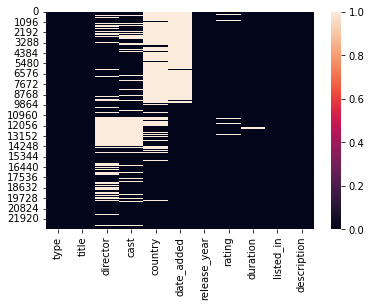

In [16]:
sns.heatmap(df.isnull())

Otra forma de ver los vaolores totales y los faltantes

In [17]:
df.count()

type            22998
title           22998
director        14739
cast            17677
country         11499
date_added      13444
release_year    22998
rating          22134
duration        22516
listed_in       22998
description     22994
dtype: int64

Al ver el contenido de las columnas podemos apreciar errores de carga. Sera necesario hacer transformaciones.

In [19]:
df_hulu["rating"].unique()

array(['TV-MA', nan, 'PG-13', 'R', 'TV-14', 'PG', 'TV-PG', 'NOT RATED',
       'G', 'TV-G', '2 Seasons', 'TV-Y', '93 min', '4 Seasons', 'TV-Y7',
       '136 min', '91 min', '85 min', '98 min', '89 min', '94 min',
       '86 min', '3 Seasons', '121 min', '88 min', '101 min', '1 Season',
       '83 min', '100 min', '95 min', '92 min', '96 min', '109 min',
       '99 min', '75 min', '87 min', '67 min', '104 min', '107 min',
       '84 min', '103 min', '105 min', '119 min', '114 min', '82 min',
       '90 min', '130 min', '110 min', '80 min', '6 Seasons', '97 min',
       '111 min', '81 min', '49 min', '45 min', '41 min', '73 min',
       '40 min', '36 min', '39 min', '34 min', '47 min', '65 min',
       '37 min', '78 min', '102 min', '129 min', '115 min', '112 min',
       'NR', '61 min', '106 min', '76 min', '77 min', '79 min', '157 min',
       '28 min', '64 min', '7 min', '5 min', '6 min', '127 min',
       '142 min', '108 min', '57 min', '118 min', '116 min', '12 Seasons',
       '71 

In [20]:
df_netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', None,
       'TV-Y7-FV', 'UR'], dtype=object)

Buscamos en otras columnas errores.

In [19]:
df_netflix[df_netflix["director"].str.contains("Season") & df_netflix["director"].notna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


Encontramos datos extraños.

Encontramos valores extraños en el dataset de amazon, se decide no eliminarlos por desconocer si su contenido es correcto.

In [53]:
filtro =(df_amazon['director'] == '1') & (df_amazon['cast'] == '1')
df_amazon[filtro]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6931,Movie,Title Post onboarding 8,1,1,NaN,NaN,2021,18+,61 min,Action,Title Post onboarding 8
s7128,Movie,Act 4 - Title before 1C onboarding 2,1,1,NaN,NaN,2021,ALL,61 min,Action,1
s7129,Movie,Act 4 - Title before 1C onboarding 1,1,1,NaN,NaN,2021,ALL,61 min,Action,1
s7140,Movie,Clip: 1,1,1,NaN,NaN,2021,18+,3 min,Action,clip1
s7239,Movie,Clip: ACT 4 - Title after removing 1C - 5,1,1,NaN,NaN,2021,ALL,61 min,Action,ACT 4 - Title after removing 1C - 5
s7240,Movie,Clip: ACT 4 - Title after removing 1C - 2,1,1,NaN,NaN,2021,ALL,61 min,Action,ACT 4 - Title after removing 1C - 2 a
s7246,Movie,ACT 4 - Title after removing 1C - 1,1,1,NaN,NaN,2021,ALL,61 min,Action,ACT 4 - Title after removing 1C -
s7259,Movie,Clip: ACT 4 - Title after removing 1C - 4,1,1,NaN,NaN,2021,7+,61 min,Comedy,ACT 4 - Title after removing 1C - 44
s8502,Movie,Act 6 - Title 1,1,1,NaN,NaN,2021,ALL,61 min,Action,Act 6 - Title 1


**3.Utilizamos Pandas Profilling Report**

In [17]:
eda_reporte = ProfileReport(df, title="Pandas Profiling Report")
eda_reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]